# Machine Learning Assignment - Linear Regression

### Step 1: Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('turboaz.csv')

data = data[['Yurush', 'Buraxilish ili', 'Qiymet']]

In [3]:
data

,Yurush,Buraxilish ili,Qiymet
0,366 000 km,1999,12500 AZN
1,102 000 km,2014,31500 $
2,469 700 km,2002,11700 AZN
3,556 680 km,1998,9700 AZN
4,300 000 km,2000,12700 AZN
...,...,...,...
1323,325 000 km,1996,8800 AZN
1324,280 000 km,1994,6300 AZN
1325,272 000 km,1998,10900 AZN
1326,207 000 km,2000,11300 AZN


In [4]:
exchange_rate = 1.7

data['Yurush'] = data['Yurush'].str.replace(' km','', regex=True).str.replace(' ','').astype(int)

data['Qiymet'] = data['Qiymet'].apply(
    lambda x: float(x.replace(' $', '').replace(' ', '')) * exchange_rate
    if '$' in x else float(x.replace(' AZN', '').replace(' ', ''))
)


In [5]:
data

,Yurush,Buraxilish ili,Qiymet
0,366000,1999,12500.0
1,102000,2014,53550.0
2,469700,2002,11700.0
3,556680,1998,9700.0
4,300000,2000,12700.0
...,...,...,...
1323,325000,1996,8800.0
1324,280000,1994,6300.0
1325,272000,1998,10900.0
1326,207000,2000,11300.0


### Step 2: Visualization

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X1 = data['Yurush']

X2 = data['Buraxilish ili']

Y = data['Qiymet']

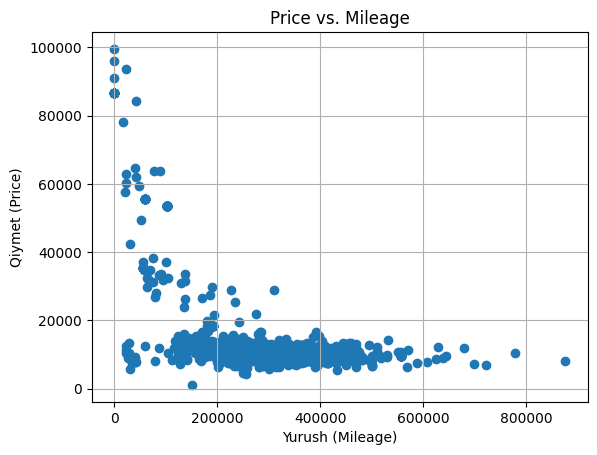

In [7]:
# Qiymet vs. Yurush:
plt.scatter(X1, Y)
plt.xlabel('Yurush (Mileage)')
plt.ylabel('Qiymet (Price)')
plt.title('Price vs. Mileage')
plt.grid(True)
plt.show()

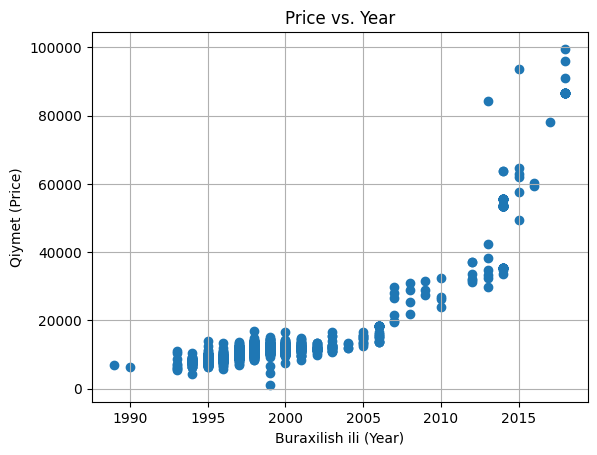

In [8]:
# Qiymet vs. Buraxilish ili:
plt.scatter(X2, Y)
plt.xlabel('Buraxilish ili (Year)')
plt.ylabel('Qiymet (Price)')
plt.title('Price vs. Year')
plt.grid(True)
plt.show()

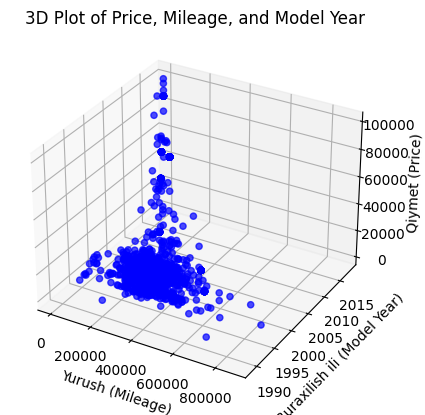

In [9]:
# 3D Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, Y, alpha=0.7, color='blue')
ax.set_xlabel('Yurush (Mileage)')
ax.set_ylabel('Buraxilish ili (Model Year)')
ax.set_zlabel('Qiymet (Price)')
plt.title('3D Plot of Price, Mileage, and Model Year')
plt.show()

### Step 3: Linear Regression from Scratch

In [10]:
import numpy as np

def compute_cost(X, y, theta):
    """
    Compute the cost for linear regression.

    Parameters:
    X : ndarray, shape (n_samples, n_features)
        The input data.
    y : ndarray, shape (n_samples,)
        The target values.
    theta : ndarray, shape (n_features,)
        The parameters of the model.

    Returns:
    cost : float
        The cost value.
    """
    n = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * n)) * np.sum((predictions - y) ** 2)
    return cost

In [11]:
def calculate_mean(column):
    return np.mean(column)

def calculate_std(column, mean):
    return np.std(column)

def z_score_normalization(column):
    mean = calculate_mean(column)
    std_dev = calculate_std(column, mean)
    return (column - mean) / std_dev

data_normalized = data.copy()
for col in data.columns:
    data_normalized[col] = z_score_normalization(data[col])

data_normalized.head()

,Yurush,Buraxilish ili,Qiymet
0,0.716157,-0.162545,-0.191748
1,-1.473366,2.653016,2.816619
2,1.576209,0.400567,-0.250376
3,2.297590,-0.350249,-0.396947
4,0.168776,0.025159,-0.177091


In [12]:
def gradient_descent(X, y, theta, alpha, iterations):
    n = len(y)
    cost_history = []

    for i in range(iterations):
        predictions = X.dot(theta)
        error = predictions - y

        gradient = (1 / n) * X.T.dot(error)
        theta -= alpha * gradient

        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

# Preparing normalized data
X_normalized = data_normalized[['Yurush', 'Buraxilish ili']].values
Y_normalized = data_normalized['Qiymet'].values

X_with_bias = np.c_[np.ones(X_normalized.shape[0]), X_normalized]  # Shape is (n, 3)

theta = np.zeros(X_with_bias.shape[1])  # [theta_0, theta_1, theta_2] set to 0

alpha = 0.001
iterations = 10000

theta, cost_history = gradient_descent(X_with_bias, Y_normalized, theta, alpha, iterations)

print(f"Optimized Theta (Parameters): {theta}")

Optimized Theta (Parameters): [ 1.67692008e-14 -9.83705199e-02  8.25840555e-01]


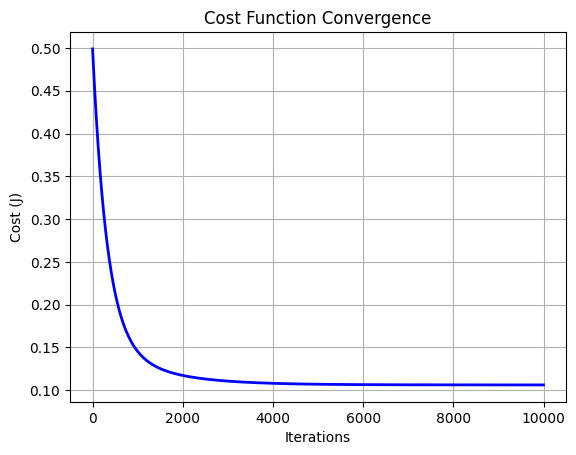

In [13]:
# Plotting the Cost Function History
plt.plot(range(len(cost_history)), cost_history, color='blue', linewidth=2)
plt.xlabel('Iterations')
plt.ylabel('Cost (J)')
plt.title('Cost Function Convergence')
plt.grid(True)
plt.show()

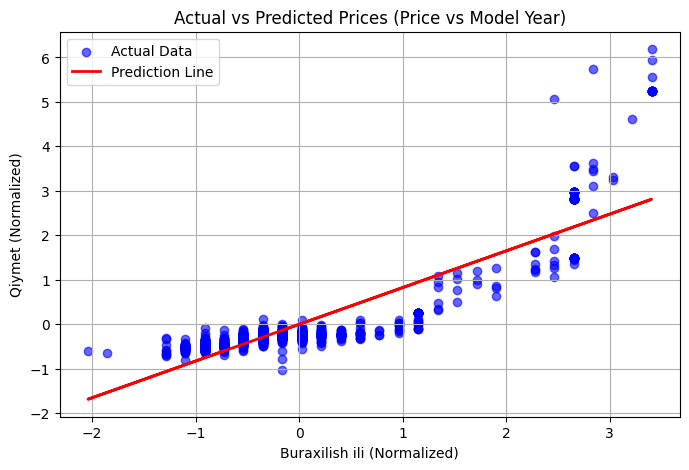

In [14]:
theta_0 = theta[0]
theta_1 = theta[1]
theta_2 = theta[2]

fixed_yurush = data_normalized['Yurush'].mean()
fixed_year = data_normalized['Buraxilish ili'].mean()

X1 = data_normalized['Buraxilish ili'].values
Y_actual = Y_normalized

Y_pred = theta_0 + theta_1 * fixed_yurush + theta_2 * X1

plt.figure(figsize=(8, 5))
plt.scatter(X1, Y_actual, color='blue', label='Actual Data', alpha=0.6)
plt.plot(X1, Y_pred, color='red', linewidth=2, label='Prediction Line')
plt.xlabel('Buraxilish ili (Normalized)')
plt.ylabel('Qiymet (Normalized)')
plt.title('Actual vs Predicted Prices (Price vs Model Year)')
plt.legend()
plt.grid(True)
plt.show()

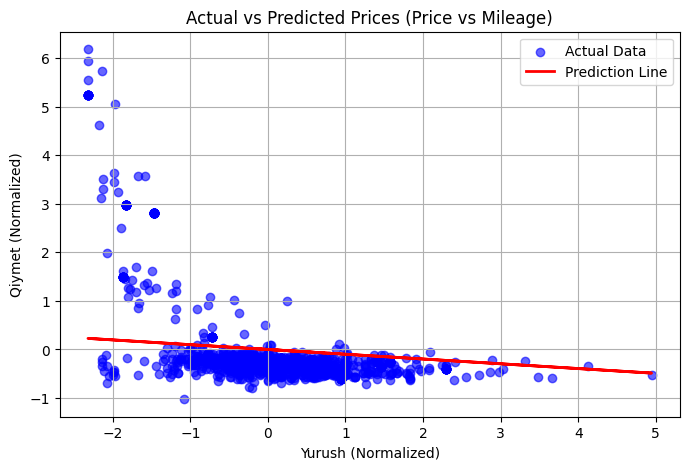

In [15]:
X2 = data_normalized['Yurush'].values

Y_pred = theta_0 + theta_1 * X2 + theta_2 * fixed_year

plt.figure(figsize=(8, 5))
plt.scatter(X2, Y_actual, color='blue', label='Actual Data', alpha=0.6)
plt.plot(X2, Y_pred, color='red', linewidth=2, label='Prediction Line')
plt.xlabel('Yurush (Normalized)')
plt.ylabel('Qiymet (Normalized)')
plt.title('Actual vs Predicted Prices (Price vs Mileage)')
plt.legend()
plt.grid(True)
plt.show()

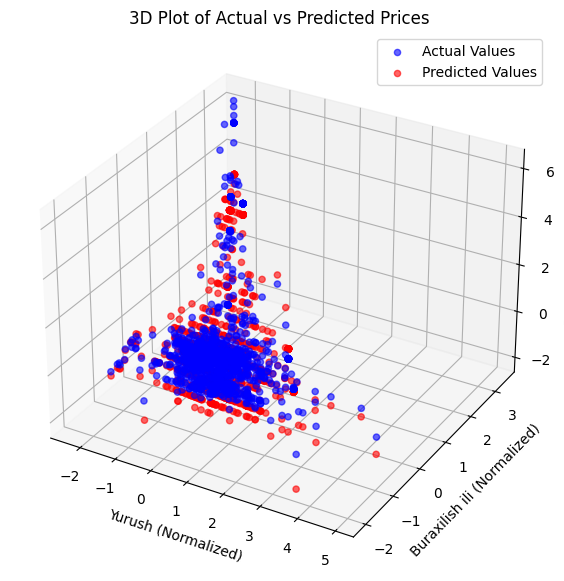

In [16]:
from mpl_toolkits.mplot3d import Axes3D

Y_pred = theta_0 + theta_1 * X2 + theta_2 * X1

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X2, X1, Y_actual, color='blue', label='Actual Values', alpha=0.6)

ax.scatter(X2, X1, Y_pred, color='red', label='Predicted Values', alpha=0.6)

ax.set_xlabel('Yurush (Normalized)')
ax.set_ylabel('Buraxilish ili (Normalized)')
ax.set_zlabel('Qiymet (Normalized)')
ax.set_title('3D Plot of Actual vs Predicted Prices')
ax.legend()
plt.show()

In [17]:
yurush_mean = data['Yurush'].mean()
yurush_std = data['Yurush'].std()
buraxilish_mean = data['Buraxilish ili'].mean()
buraxilish_std = data['Buraxilish ili'].std()

price_mean = data['Qiymet'].mean()
price_std = data['Qiymet'].std()

def normalize(value, mean, std):
    return (value - mean) / std

def unnormalize(value, mean, std):
    return value * std + mean

car1_yurush = normalize(240000, yurush_mean, yurush_std)
car1_year = normalize(2000, buraxilish_mean, buraxilish_std)

car2_yurush = normalize(415558, yurush_mean, yurush_std)
car2_year = normalize(1996, buraxilish_mean, buraxilish_std)

car1_price_pred_norm = theta_0 + theta_1 * car1_yurush + theta_2 * car1_year
car2_price_pred_norm = theta_0 + theta_1 * car2_yurush + theta_2 * car2_year

car1_price_pred_actual = unnormalize(car1_price_pred_norm, price_mean, price_std)
car2_price_pred_actual = unnormalize(car2_price_pred_norm, price_mean, price_std)

print(f"Predicted Price for Car 1: {car1_price_pred_actual:.2f} AZN (Actual: 11500 AZN)")
print(f"Predicted Price for Car 2: {car2_price_pred_actual:.2f} AZN (Actual: 8800 AZN)")


Predicted Price for Car 1: 15841.37 AZN (Actual: 11500 AZN)
Predicted Price for Car 2: 5426.15 AZN (Actual: 8800 AZN)


### Step 4: Linear Regression Using Library

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X_normalized = data_normalized[['Yurush', 'Buraxilish ili']].values
Y_normalized = data_normalized['Qiymet'].values

model = LinearRegression()
model.fit(X_normalized, Y_normalized)

print("Model Coefficients (Normalized):", model.coef_)
print("Model Intercept (Normalized):", model.intercept_)

Y_pred_normalized = model.predict(X_normalized)

mse = mean_squared_error(Y_normalized, Y_pred_normalized)
r2 = r2_score(Y_normalized, Y_pred_normalized)

print("\nModel Evaluation on the Normalized Dataset:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Model Coefficients (Normalized): [-0.09334375  0.83086746]
Model Intercept (Normalized): 1.696126024004888e-14

Model Evaluation on the Normalized Dataset:
Mean Squared Error (MSE): 0.21
R^2 Score: 0.79


In [19]:
def normalize_new_input(new_data, original_data):
    """Normalize new input data using Z-score normalization."""
    means = original_data.mean(axis=0)
    stds = original_data.std(axis=0)
    return (new_data - means) / stds

new_cars = np.array([
    [240000, 2000],  # Car 1
    [415558, 1996]   # Car 2
])

original_features = data[['Yurush', 'Buraxilish ili']].values
new_cars_normalized = normalize_new_input(new_cars, original_features)

predicted_prices_normalized = model.predict(new_cars_normalized)

price_mean = data['Qiymet'].mean()
price_std = data['Qiymet'].std()

predicted_prices = [
    unnormalize(pred, price_mean, price_std) for pred in predicted_prices_normalized
]

actual_prices = [11500, 8800]

for i, (pred, actual) in enumerate(zip(predicted_prices, actual_prices)):
    print(f"\nCar {i+1} - Predicted Price: {pred:.2f} AZN, Actual Price: {actual} AZN")
    print(f"Difference: {abs(pred - actual):.2f} AZN")



Car 1 - Predicted Price: 15820.81 AZN, Actual Price: 11500 AZN
Difference: 4320.81 AZN

Car 2 - Predicted Price: 5450.05 AZN, Actual Price: 8800 AZN
Difference: 3349.95 AZN


### Step 5: Linear Regression Using Normal Equation

In [20]:
X = np.c_[np.ones((data.shape[0], 1)), data[['Yurush', 'Buraxilish ili']].values]
y = data['Qiymet'].values

theta_normal = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print(f"Theta computed from the normal equation: {theta_normal}")

Y_pred_normal = X.dot(theta_normal)

mse_normal = mean_squared_error(y, Y_pred_normal)
r2_normal = r2_score(y, Y_pred_normal)

print("\nNormal Equation Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_normal:.2f}")
print(f"R^2 Score: {r2_normal:.2f}")

Theta computed from the normal equation: [-4.23780261e+06 -1.05636330e-02  2.12807921e+03]

Normal Equation Model Evaluation:
Mean Squared Error (MSE): 39556044.58
R^2 Score: 0.79


In [21]:
new_cars_with_bias = np.c_[
    np.ones((new_cars.shape[0], 1)),
    new_cars
]

predicted_prices_normal = new_cars_with_bias.dot(theta_normal)

for i, (pred, actual) in enumerate(zip(predicted_prices_normal, actual_prices)):
    print(f"\nCar {i+1} (Normal Equation) - Predicted Price: {pred:.2f} AZN, Actual Price: {actual} AZN")
    print(f"Difference: {abs(pred - actual):.2f} AZN")



Car 1 (Normal Equation) - Predicted Price: 15820.54 AZN, Actual Price: 11500 AZN
Difference: 4320.54 AZN

Car 2 (Normal Equation) - Predicted Price: 5453.69 AZN, Actual Price: 8800 AZN
Difference: 3346.31 AZN
